### libs

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
def calc_freq_signal(sdf: pd.DataFrame, col) -> pd.DataFrame:
    sdf = sdf.groupby([col], dropna=False, observed=False).agg(
        **{
            "n": (col, "size"),
        }
    )
    sdf[f"{col}_freq"] = sdf["n"] / sdf["n"].sum()
    return sdf

### data

In [10]:
import yfinance as yf

asset = "ES=F"
tk = yf.Ticker(asset)
hist = tk.history(period="max", interval="1mo", auto_adjust=False)[
    ["Close"]
]  # [['Open', 'High', 'Low', 'Close', 'Volume']]
hist.columns = [c.lower() for c in hist.columns]
hist["r_12m"] = hist["close"].pct_change(12)

print(f"{hist.shape = }")
print(hist.head().to_string())

hist.shape = (258, 2)
                            close  r_12m
Date                                    
2000-09-01 00:00:00-04:00  1454.0    NaN
2000-11-01 00:00:00-05:00  1321.0    NaN
2000-12-01 00:00:00-05:00  1327.0    NaN
2001-01-01 00:00:00-05:00  1373.5    NaN
2001-02-01 00:00:00-05:00  1242.0    NaN


### content

In [15]:
df = hist
col = "r_12m"
ff = lambda x: ~x[col].isna()
edges = np.linspace(-0.5, 0.5, 11)

# cut
df2 = df.loc[lambda x: ff(x), :].copy()
df2[f"{col}_binned"] = pd.cut(df2[col], bins=edges, right=False)

# signal
pdf = calc_freq_signal(df2, col=f"{col}_binned")
pdf

,n,r_12m_binned_freq
r_12m_binned,,
"[-0.5, -0.4)",2,0.008130
"[-0.4, -0.3)",5,0.020325
"[-0.3, -0.2)",9,0.036585
"[-0.2, -0.1)",17,0.069106
"[-0.1, 0.0)",22,0.089431
"[0.0, 0.1)",53,0.215447
"[0.1, 0.2)",68,0.276423
"[0.2, 0.3)",52,0.211382
"[0.3, 0.4)",12,0.048780


<BarContainer object of 10 artists>

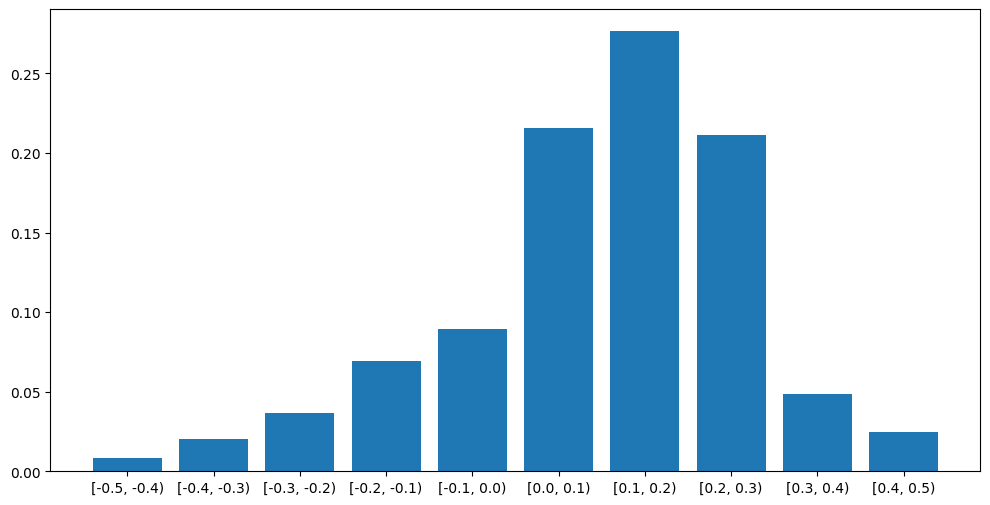

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(pdf.index.astype(str), pdf[f"{col}_binned_freq"])